# Segmentation and Clustering Demos

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zLBQ7YBpcHCn4IlngPlQyqDIJpsBenDH?usp=sharing)

## MRI Brain Segmentation

In [158]:
!pip -q install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.util import img_as_float
from skimage.segmentation import slic, mark_boundaries
from skimage.filters import threshold_otsu

In [159]:
 # MRI scan of brain.....not pixels but voxels!
brain = data.brain()

In [160]:
brain.shape

(10, 256, 256)

In [161]:
# Pick brain slice between 0 and 9
img = img_as_float(brain[9])

 SLIC (Simple Linear Iterative Clustering) Unsupervised Algorithm

In [162]:
# Threshold segmentation
segments = slic(img, n_segments=150, compactness=10, start_label=1, channel_axis=None)
seg_vis = mark_boundaries(np.dstack([img, img, img]), segments)
th = threshold_otsu(img)
mask = img > th

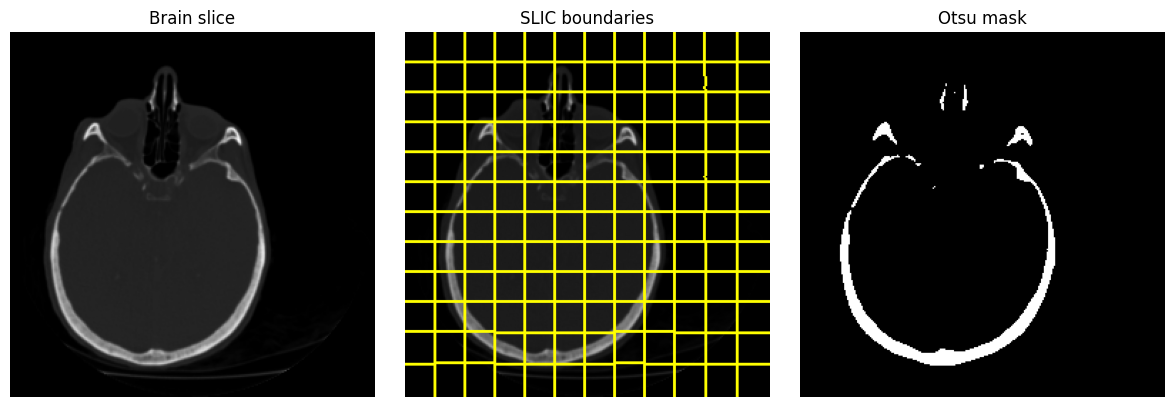

In [163]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap="gray"); plt.title("Brain slice"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(seg_vis); plt.title("SLIC boundaries"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(mask, cmap="gray"); plt.title("Otsu mask"); plt.axis("off")
plt.tight_layout(); plt.show()


K-Means Clustering

In [164]:
!pip -q install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.util import img_as_float
from sklearn.cluster import KMeans

In [165]:
H, W = img.shape
X = img.reshape(-1, 1)

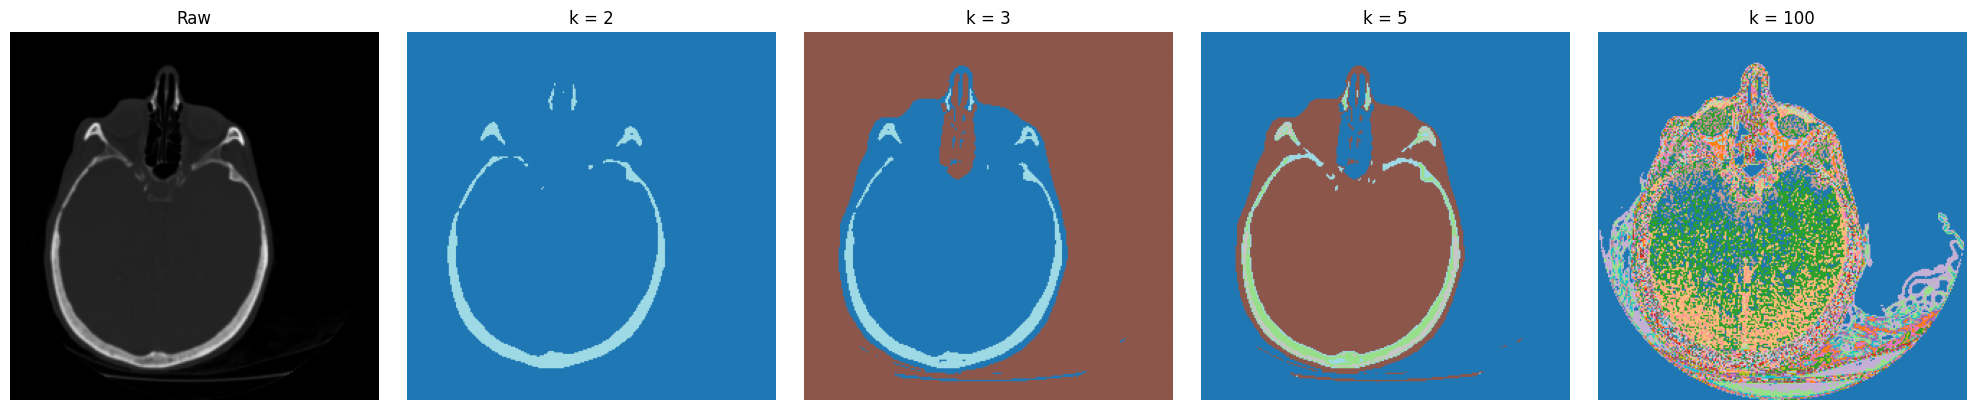

In [166]:
k_list = [2, 3, 5, 100]  # change as you like


ncols = 1 + len(k_list)
plt.figure(figsize=(4*ncols, 4))
ax = plt.subplot(1, ncols, 1)
ax.imshow(img, cmap="gray")
ax.set_title("Raw")
ax.axis("off")

# each k
for j, k in enumerate(k_list, start=2):
    km = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X)
    seg = km.labels_.reshape(H, W)
    ax = plt.subplot(1, ncols, j)
    ax.imshow(seg, cmap="tab20")
    ax.set_title(f"k = {k}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Hubble Space Telescope

In [167]:
from skimage import data
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [168]:
img = data.hubble_deep_field()  # RGB image that works well for demo
h, w, c = img.shape
X = img.reshape(-1, c).astype(np.float32)

K-Means Clustering

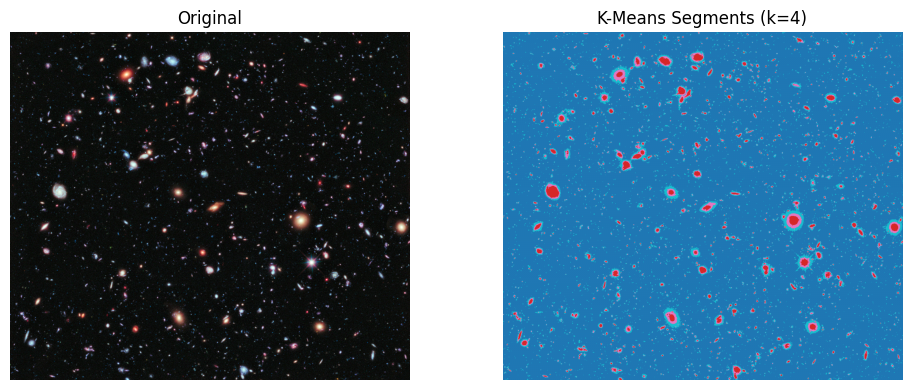

In [169]:
k = 4
km = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X)
seg = km.labels_.reshape(h, w)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(seg, cmap="tab10"); plt.title(f"K-Means Segments (k={k})"); plt.axis("off")
plt.tight_layout(); plt.show()

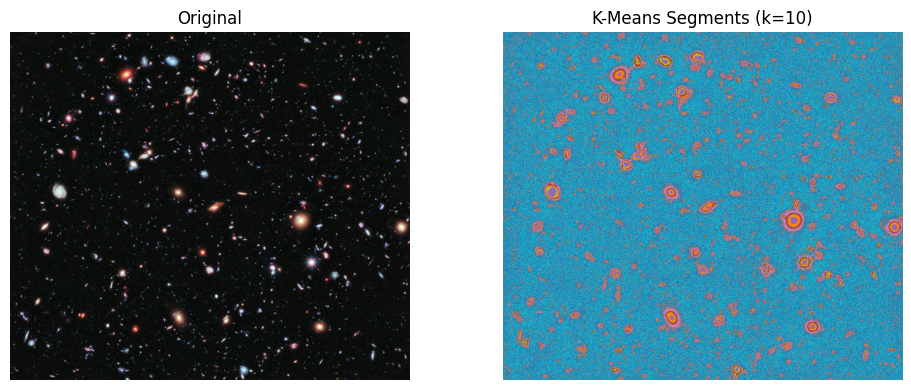

In [170]:
k = 10
km = KMeans(n_clusters=k, n_init=10, random_state=0).fit(X)
seg = km.labels_.reshape(h, w)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(seg, cmap="tab10"); plt.title(f"K-Means Segments (k={k})"); plt.axis("off")
plt.tight_layout(); plt.show()

## MNIST Dataset for Optical Character Recognition (OCR)

In [171]:
import numpy as np, pandas as pd
import plotly.express as px
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from math import ceil

In [172]:
digits = load_digits()
images = digits.images
labels = digits.target

X = digits.data
y = digits.target.astype(str)

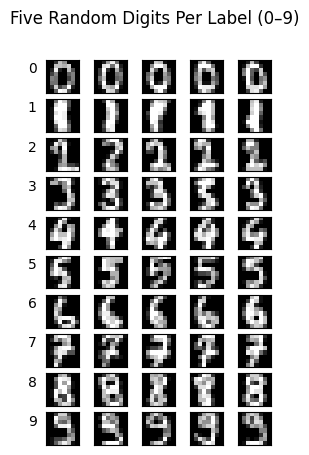

In [173]:
n_labels = 10
n_per_label = 5

plt.figure(figsize=(3, 5))
plot_idx = 1

for label in range(n_labels):
    idxs = np.where(labels == label)[0]
    chosen = np.random.choice(idxs, size=min(n_per_label, len(idxs)), replace=False)
    for i in chosen:
        ax = plt.subplot(n_labels, n_per_label, plot_idx)
        ax.imshow(images[i], cmap="gray")
        ax.set_xticks([]); ax.set_yticks([])
        if plot_idx % n_per_label == 1:
            ax.set_ylabel(label, rotation=0, labelpad=10, fontsize=10)
        plot_idx += 1

plt.suptitle("Five Random Digits Per Label (0–9)")
plt.show()

Principal Component Analysis (PCA)

In [174]:
pca = PCA(n_components=3, random_state=0)
X_pca = pca.fit_transform(X)

df = pd.DataFrame(X_pca, columns=["PC1","PC2","PC3"])
df["label"] = y

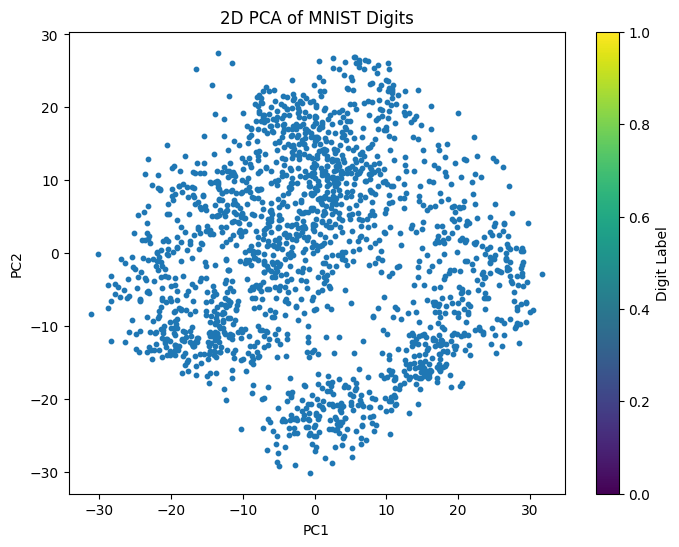

In [175]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of MNIST Digits")
plt.colorbar(scatter, label="Digit Label")
plt.show()

In [176]:
fig = px.scatter_3d(
    df, x="PC1", y="PC2", z="PC3",
    title="MNIST Digits Dataset PCA 3D - Raw Output",
    opacity=0.8
)
fig.update_traces(marker=dict(size=3))
fig.show()

Coloring By Data Labels

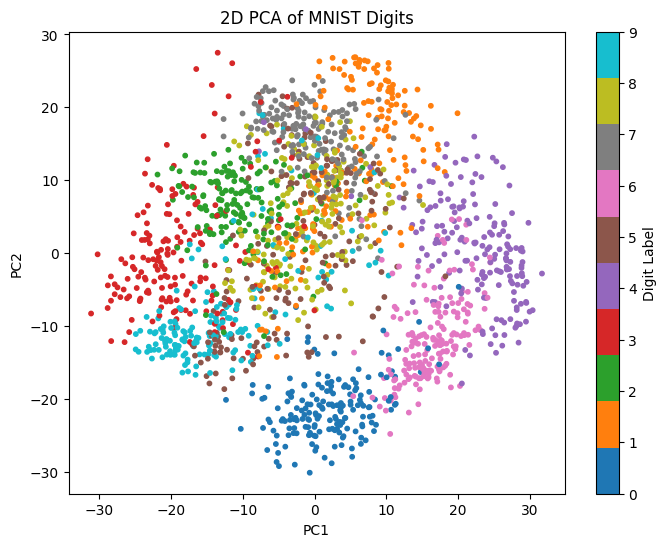

In [177]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA of MNIST Digits")
plt.colorbar(scatter, label="Digit Label")
plt.show()

In [178]:
fig = px.scatter_3d(
    df, x="PC1", y="PC2", z="PC3",
    color="label",
    title="MNIST Digits Dataset PCA 3D - Colored By Digit",
    opacity=0.8
)
fig.update_traces(marker=dict(size=3))
fig.show()

In [179]:
# Compute average PCA x and y for each label
avg_pca = df.groupby("label")[["PC1", "PC2"]].mean().round(3).reset_index()
avg_pca.sort_values(by="PC1")

,label,PC1,PC2
3,3,-18.665,-0.087
9,9,-13.047,-7.623
2,2,-9.820,6.379
5,5,-2.968,0.225
8,8,-1.267,4.795
7,7,-0.171,15.807
0,0,1.956,-21.133
1,1,5.428,12.692
6,6,16.183,-11.595
4,4,22.253,0.578
